In [7]:
import csv
import numpy as np 
import pandas as pd 
import random
import matplotlib.pyplot as plt
# sklearn modules
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVR

def read_csv(csv_file):
    '''Returns numpy array and panda version of the file'''
    csv_file = csv_file +".csv"
    df = pd.DataFrame()
    df = df.from_csv(csv_file, header=0, sep=',', index_col=0)
#n=df.shape[0] # number of samples
#d=df.shape[1] # number of features
    array = np.asarray(df,dtype="|S6")
    if np.shape(array)[1] == 1:
        array = array.ravel()
    return array, df


In [8]:
tr_in, df_in = read_csv("reg_train_in")
tr_in = np.asarray(tr_in,dtype="float64")
tr_out, df_out = read_csv("reg_train_out")
tr_out = np.asarray(tr_out,dtype="float64")
te_in, df = read_csv("reg_test_in") # Still have to deal with NaNs best

In [9]:
tr_mean = tr_in.mean(axis=0)
tr_std = tr_in.std(axis=0)
X = preprocessing.scale(tr_in)  # Clean (mean 0, variance 1) data-set
y = tr_out

def subset(X,N):
    index = np.random.randint(np.shape(X)[0], size=N)
    if len(np.shape(X)) == 1: 
        X_sub = X[index]
    else:
        X_sub = X[index,:]

In [10]:
cv = ShuffleSplit(n_splits=5,  test_size=0.20, random_state=random.randint(0,20), train_size=500) # 10_splits
for train_index, test_index in cv.split(X):
    print("TRAIN:", len(list(train_index)), "TEST:", test_index)

('TRAIN:', 500, 'TEST:', array([20931, 15752, 25538, ..., 14675, 18425,   660]))
('TRAIN:', 500, 'TEST:', array([21466, 15142, 25933, ..., 12880, 24583, 14121]))
('TRAIN:', 500, 'TEST:', array([15414,   222, 31592, ..., 29283,   469, 16007]))
('TRAIN:', 500, 'TEST:', array([11200,  6479, 10940, ..., 29284,   437, 22469]))
('TRAIN:', 500, 'TEST:', array([ 5995, 24316, 27014, ...,  1968, 28392, 25857]))


In [11]:
def compare_features(X,n1,n2,N):
    index = np.random.randint(np.shape(X)[0], size=N)
    X_sub = X[index,:]
    plt.scatter(X_sub[:,n1],X_sub[:,n2])
    plt.title(str(n1+1)+" vs "+ str(n2+1))
    plt.show()
def compare_output(X,y,feature_list,N):
    index = np.random.randint(np.shape(X)[0], size=N)
    X_sub = X[index,:]
    y_sub = y[index]
    for i in feature_list:
        plt.scatter(X_sub[:,i],y_sub[:])
        plt.title(str(i+1)+" vs output")
        plt.show()

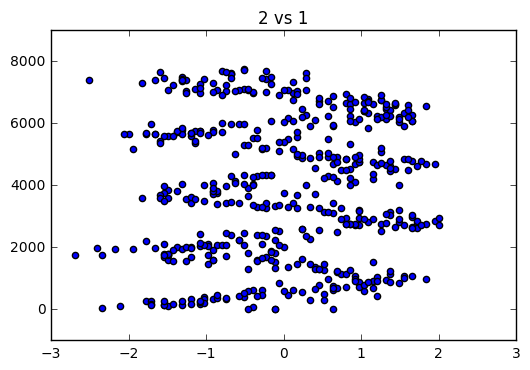

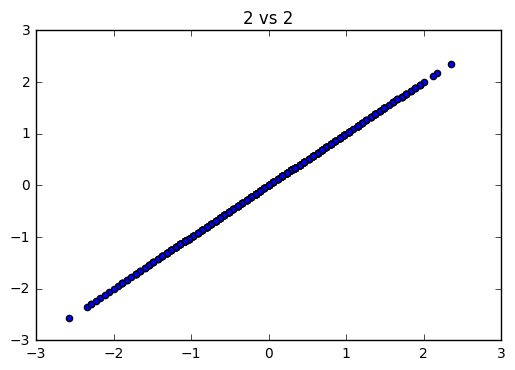

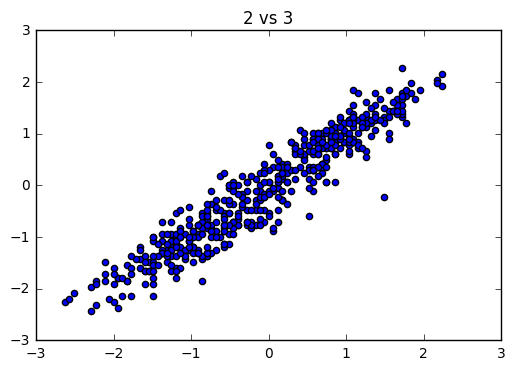

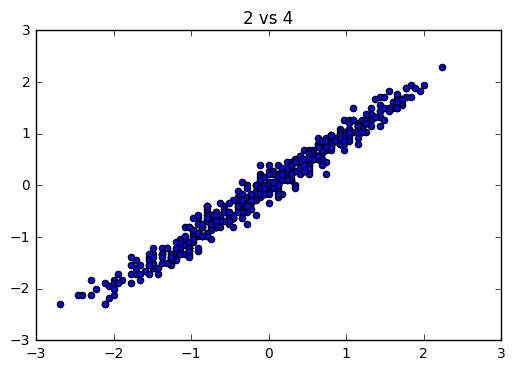

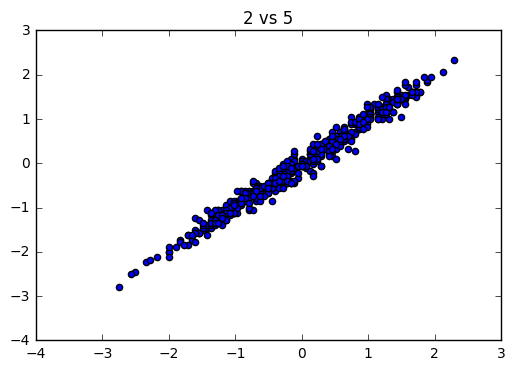

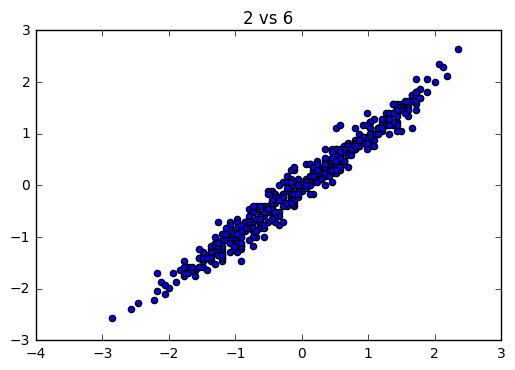

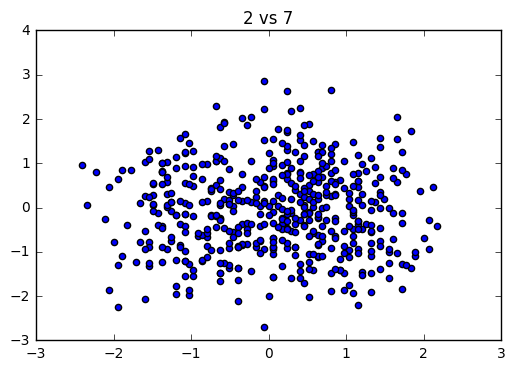

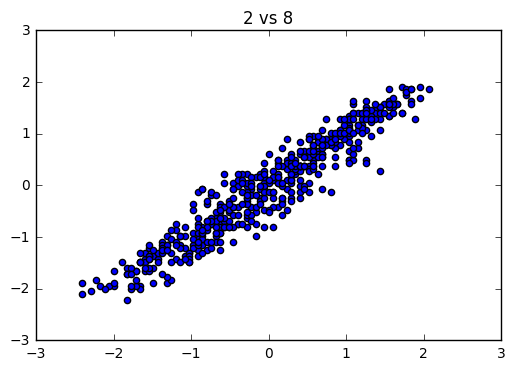

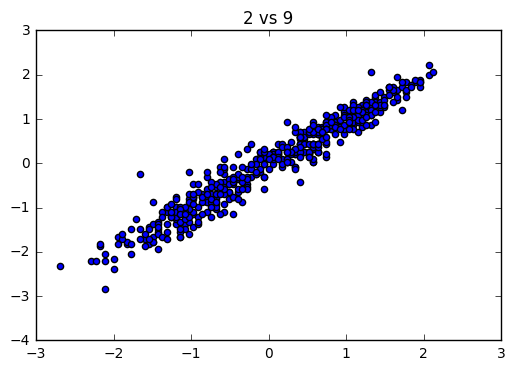

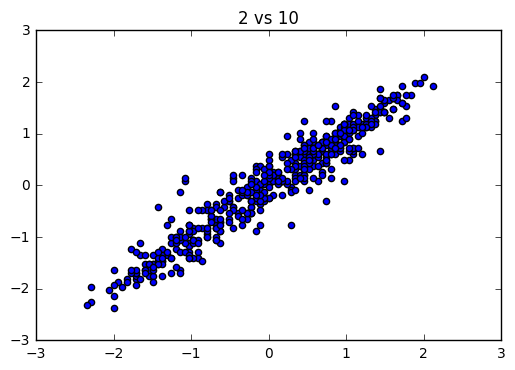

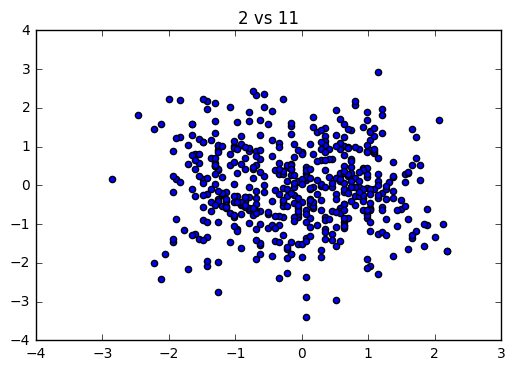

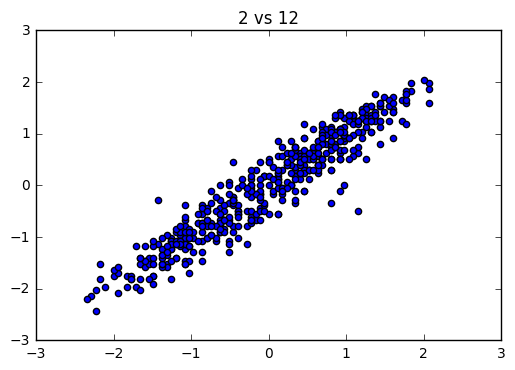

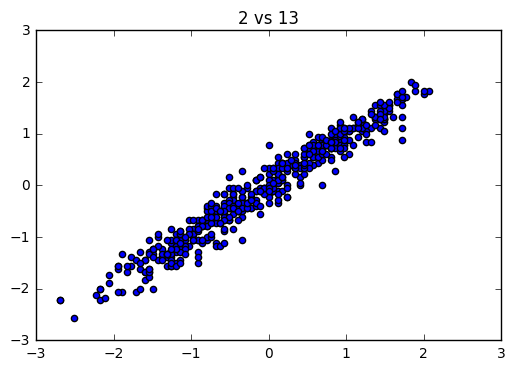

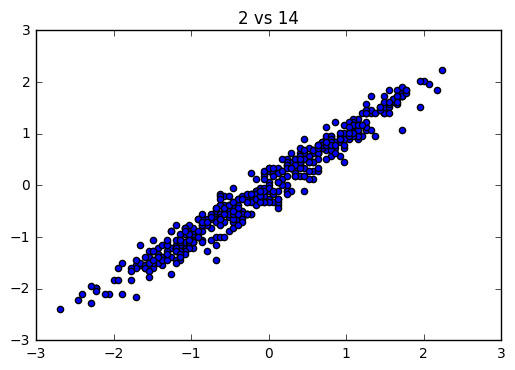

In [12]:
# Plot features vs features to observe correlation
for i in range(0, 14):
    compare_features(tr_in, 1 , i, 500)


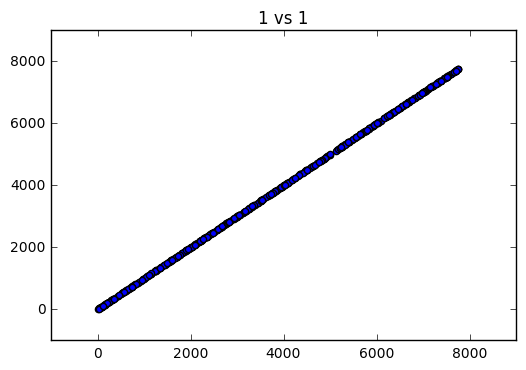

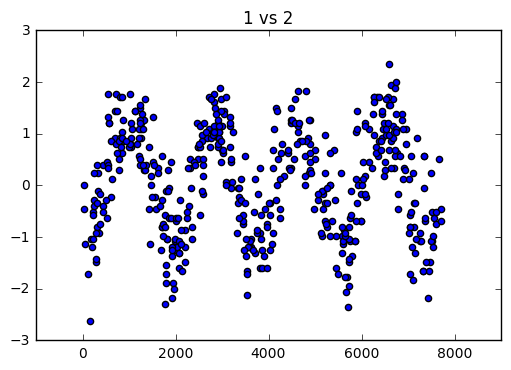

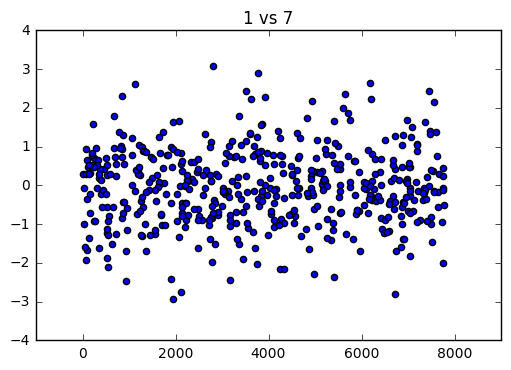

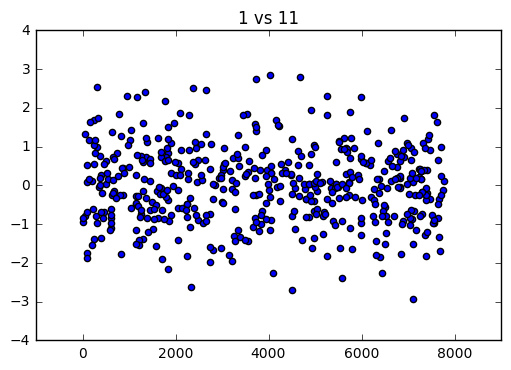

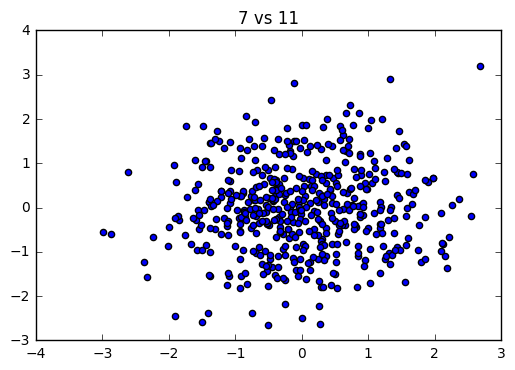

In [13]:
for i in [0, 1,6,10]:
    compare_features(tr_in, 0 , i, 500)
compare_features(tr_in, 6 , 10, 500)

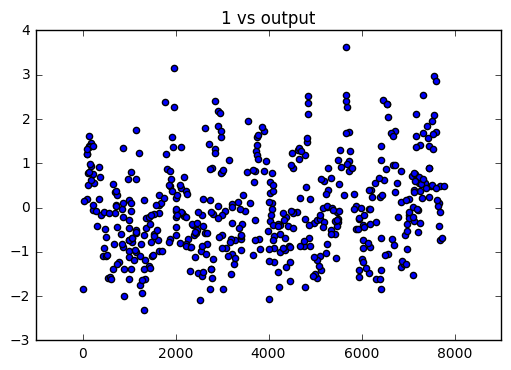

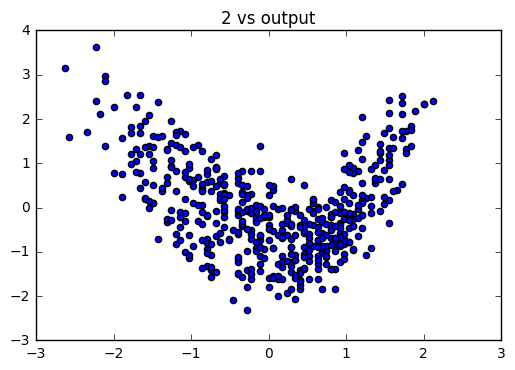

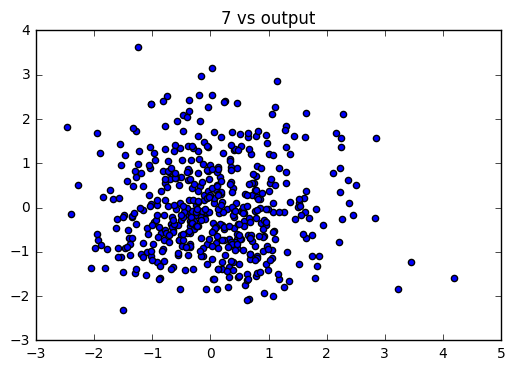

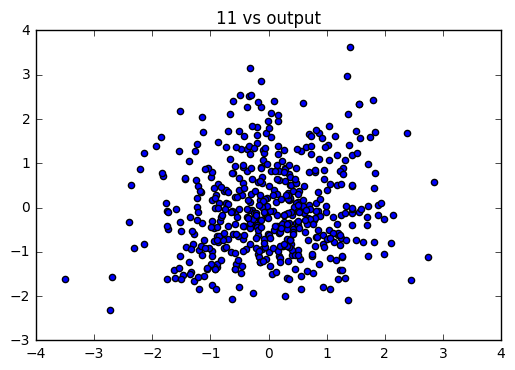

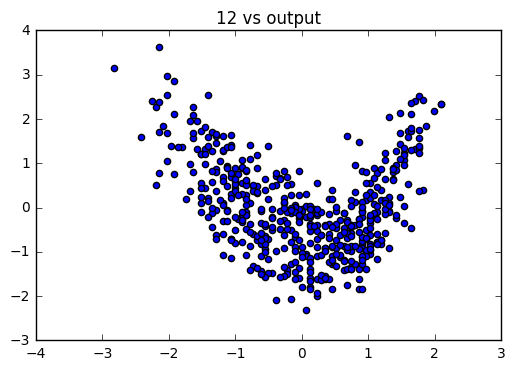

In [14]:
 compare_output(tr_in, tr_out, [0, 1,6,10,11], 500)

# PCA (dim reduction) seems to be a good option

In [9]:
pca = PCA(n_components=4)
pca.fit(X)
print "Variance taken by each of the principal components", pca.explained_variance_ratio_

Variance taken by each of the principal components [ 0.76530528  0.07220808  0.07137663  0.07086174]


# Compare contributions features 1, 7, 11 vs correlated 2, 3, 4, 5, 6 ...  to first component

In [10]:
for i in [0, 6, 10]:
    print pca.components_[0][i]
for i in [1, 2, 3, 4, 5, 7, 8, 9 ,11, 12, 13]:
    print pca.components_[0][i]

0.00148448378534
-0.000298728741862
0.000684493551293
-0.301174209831
-0.298618834183
-0.303221870112
-0.300111690365
-0.302908925504
-0.301047295081
-0.302013333199
-0.301635230356
-0.299597628647
-0.303568830098
-0.302680799173


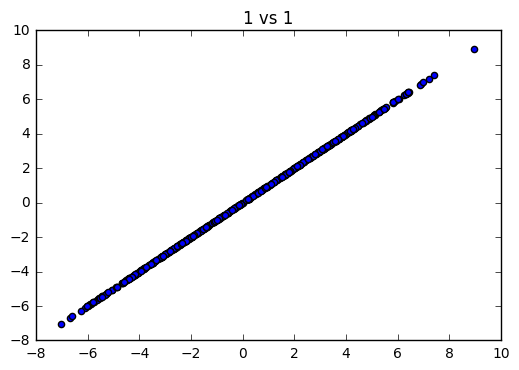

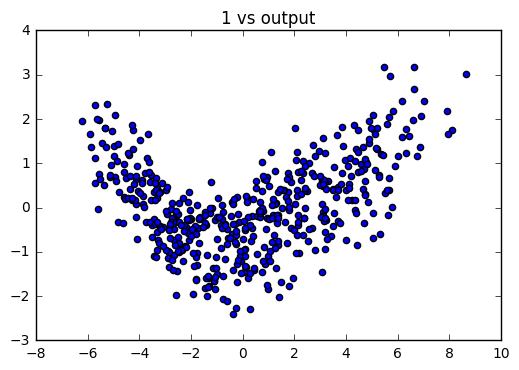

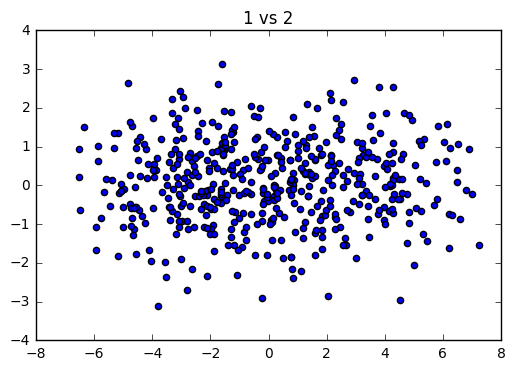

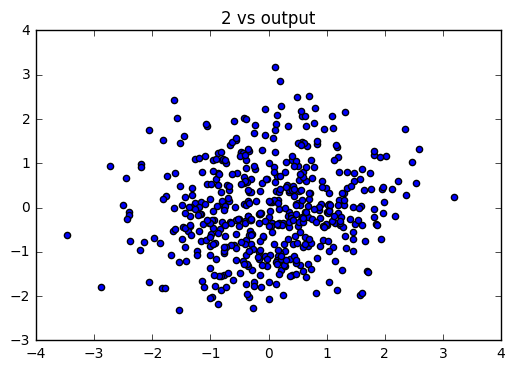

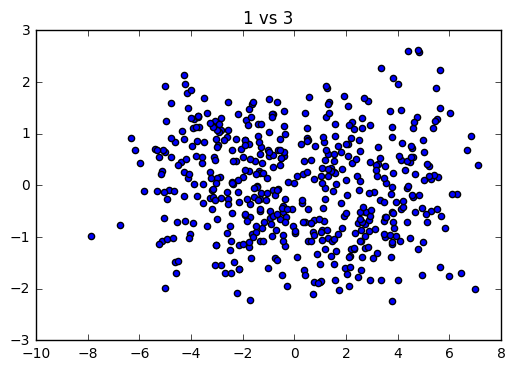

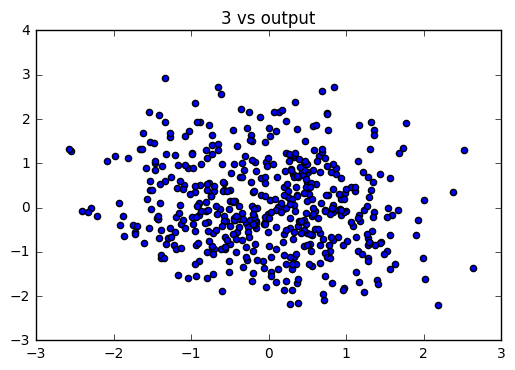

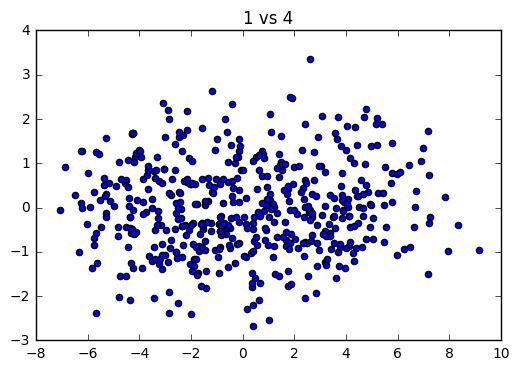

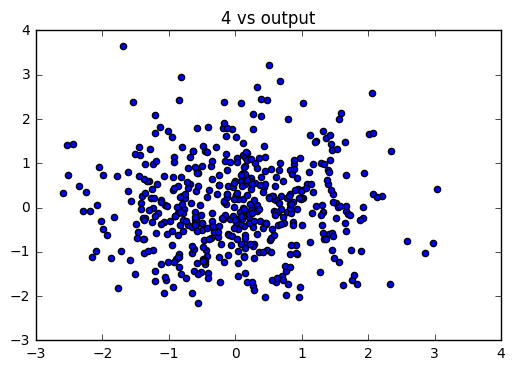

In [11]:
X_pca = pca.transform(X)
for i in range(0,4):
    compare_features(X_pca, 0 , i, 500)
    compare_output(X_pca,y, [i], 500)

# Modelling

In [15]:
mean_tr = np.mean(tr_in,axis = 0)
std_tr = np.std(tr_in,axis = 0)
df = pd.DataFrame()
df = df.from_csv("reg_test_gp.csv", header=None, sep=',', index_col=None)
te_gp= np.asarray(df,dtype="float64")
X_test = np.divide(np.add(te_gp,-mean_tr),std_tr)


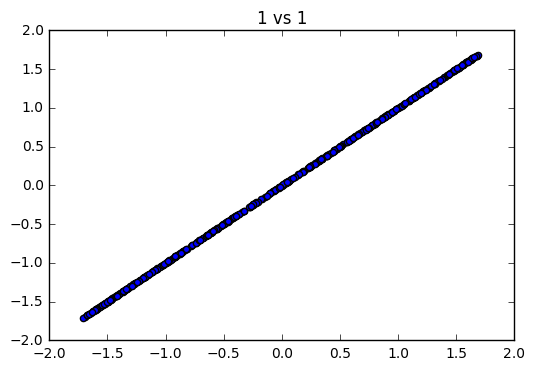

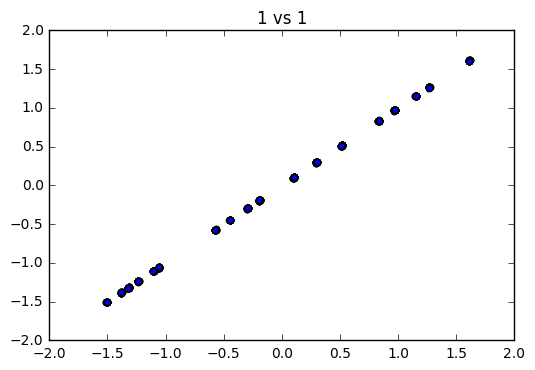

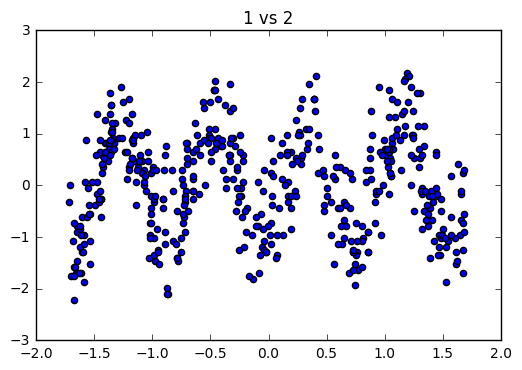

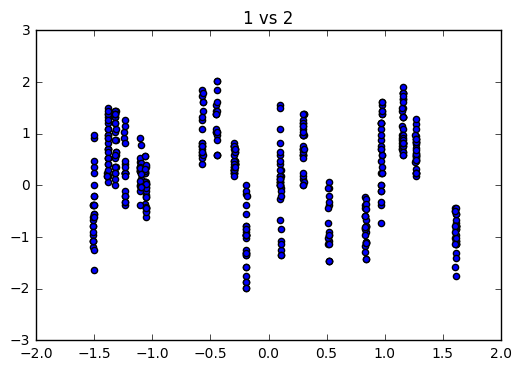

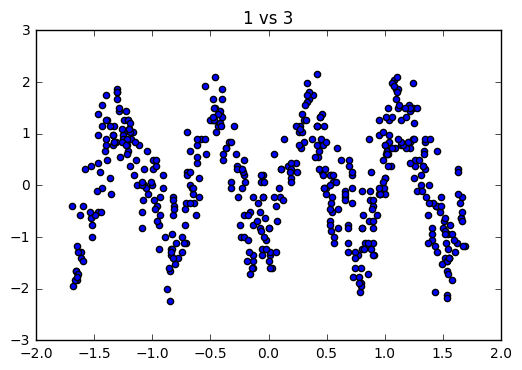

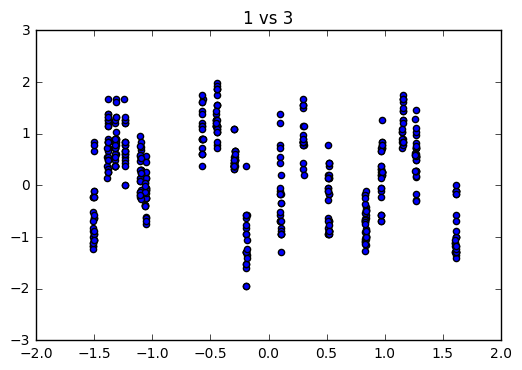

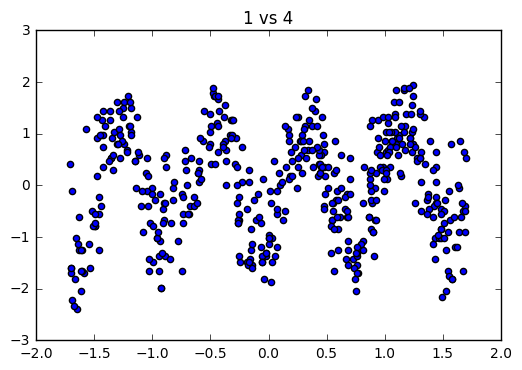

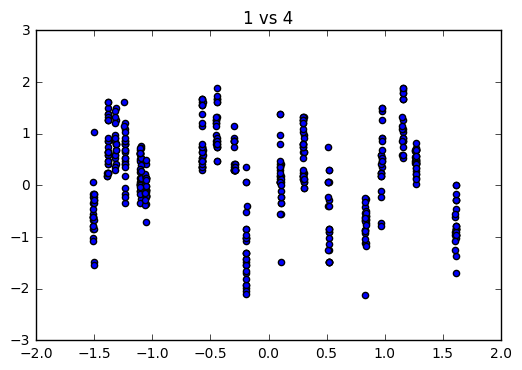

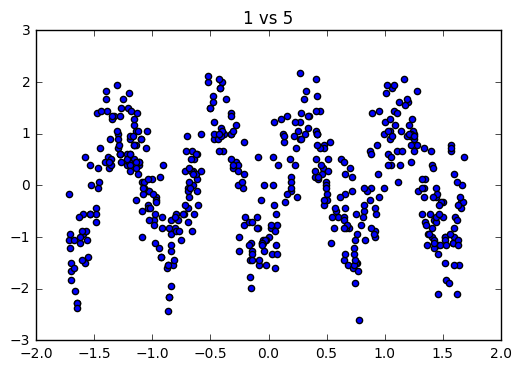

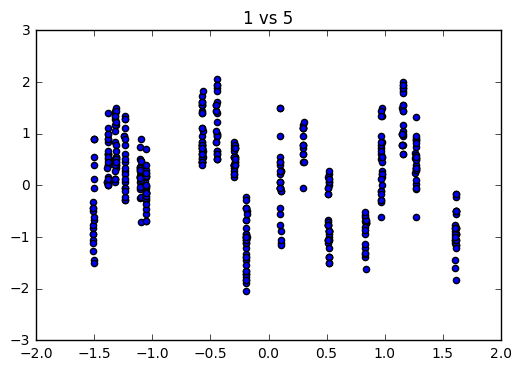

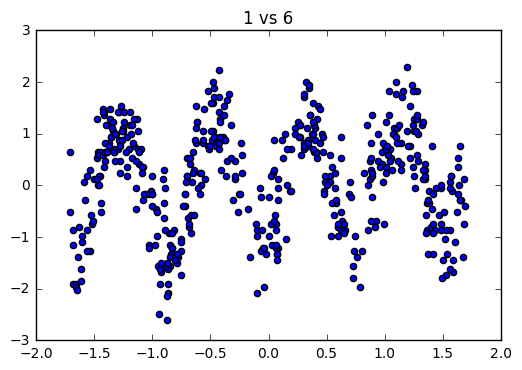

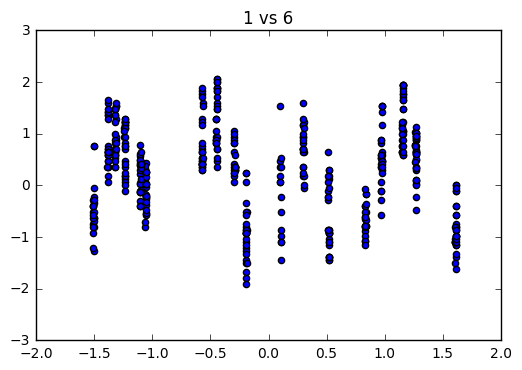

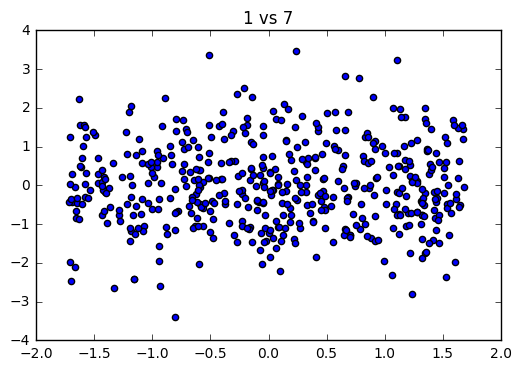

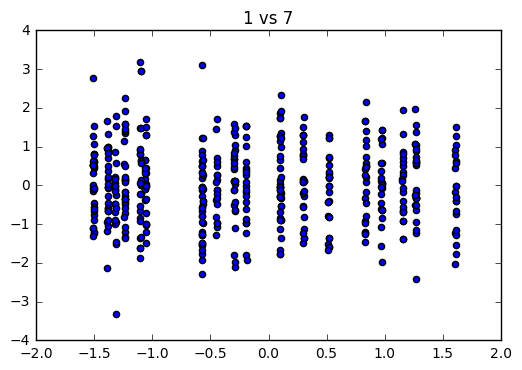

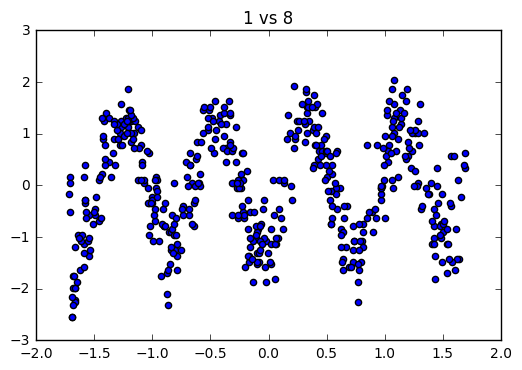

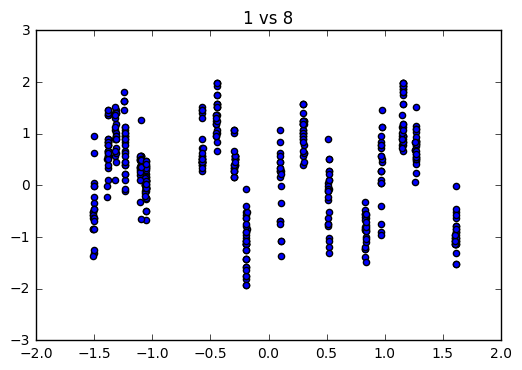

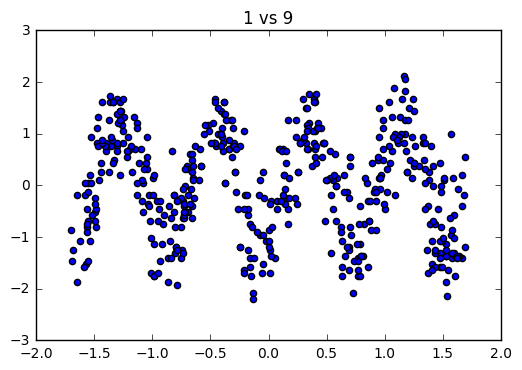

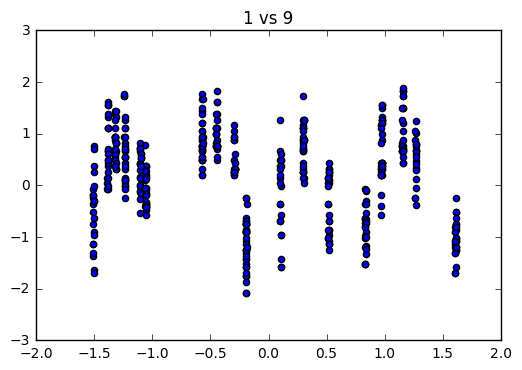

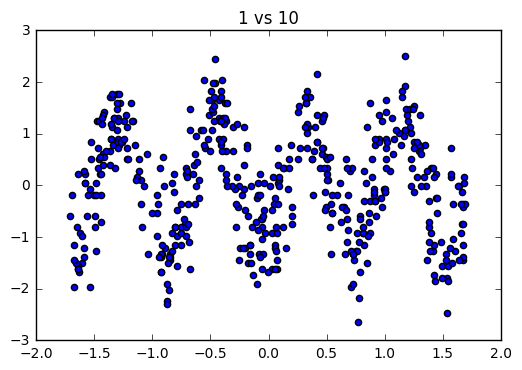

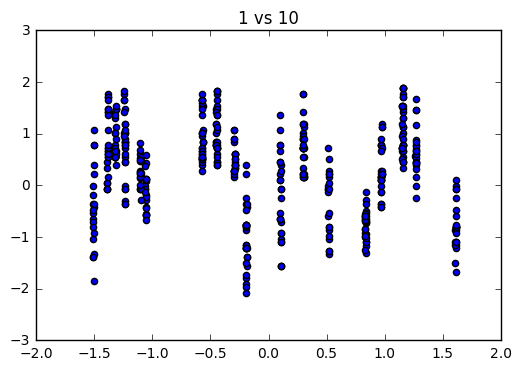

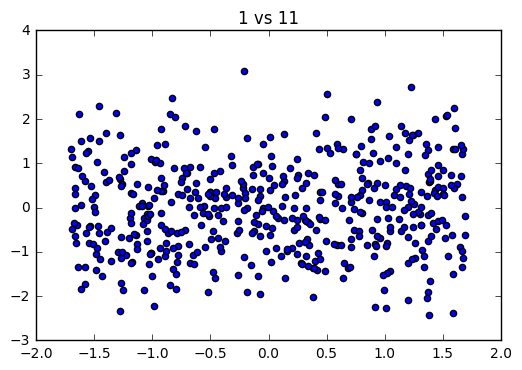

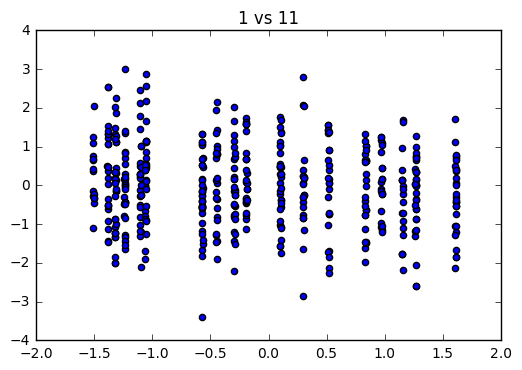

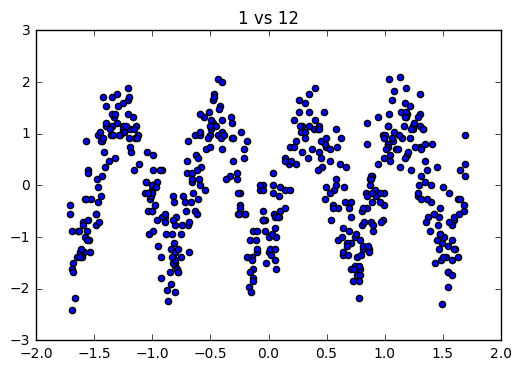

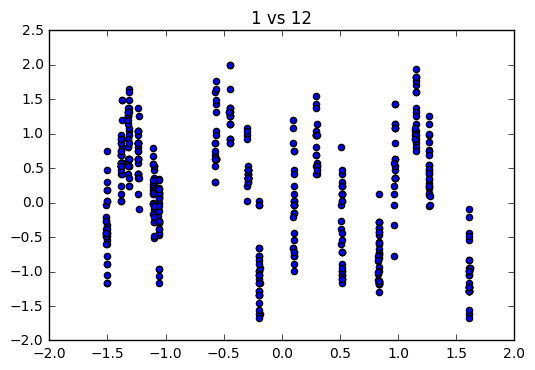

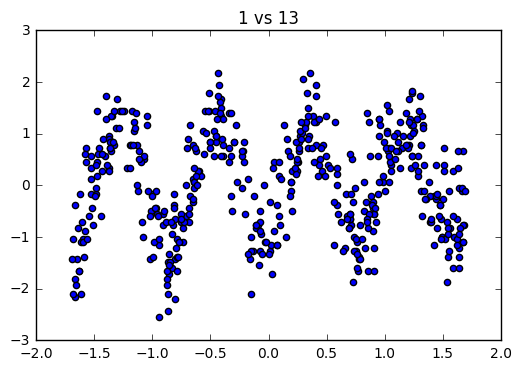

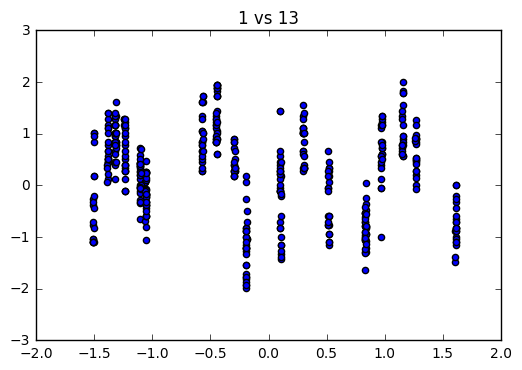

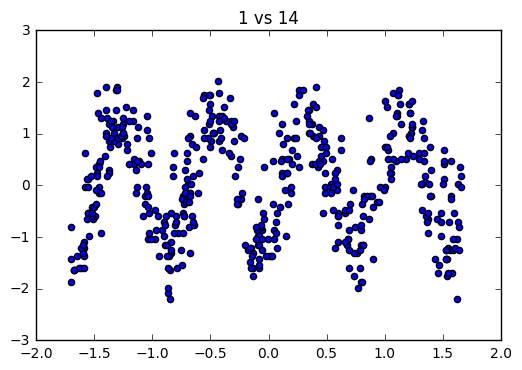

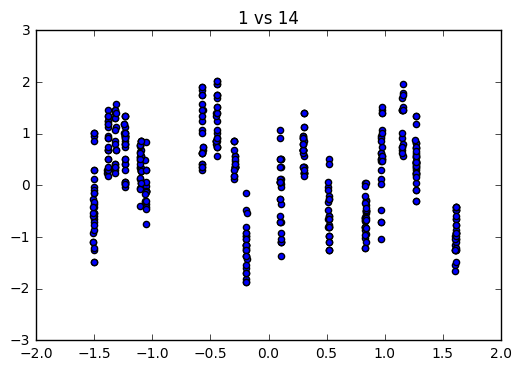

In [18]:
for i in range(0,14):
    compare_features(X, 0 , i, 500)
    compare_features(X_test, 0 ,i, 500)